<a href="https://colab.research.google.com/github/kaguya1997/Signal-System/blob/main/B0529015_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1.2

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

我選擇使用的是這份音檔:https://freesound.org/people/acollier123/sounds/573602/
在此感謝acollier123所提供的檔案

In [ ]:
if not os.path.exists('573602__acollier123__vibrato-piano-c.wav'):
    !wget https://github.com/kaguya1997/Signal-System/raw/main/573602__acollier123__vibrato-piano-c.wav

In [ ]:
from thinkdsp import read_wave

wave = read_wave('573602__acollier123__vibrato-piano-c.wav')
wave.normalize()
wave.make_audio()

以下是這個音檔的wave

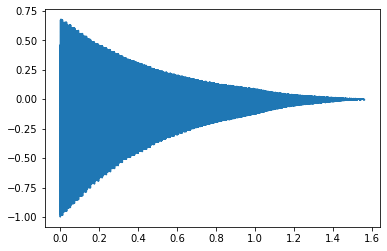

In [ ]:
wave.plot()

我選擇取出最一開始的0.5秒來作處理

In [ ]:
segment = wave.segment(start=0, duration=0.4)
segment.make_audio()

畫出這個片段:

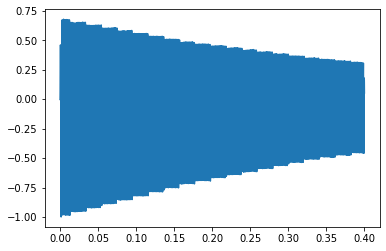

In [ ]:
segment.plot()


以下是用更短的間隔作出的waveform:

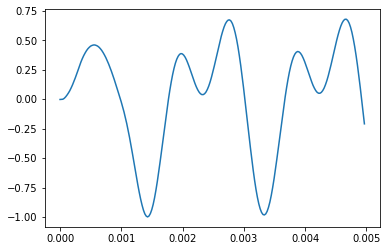

In [ ]:
segment.segment(start=0, duration=0.005).plot()

以下是這個segment的spectrum:

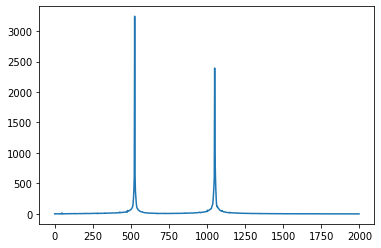

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=2000)

用 peaks 來依照降序顯示這個spectrum中各點的frequencies:

In [ ]:
spectrum.peaks()[:30]

[(3242.3712991539683, 525.0),
 (2392.2753121527926, 1050.0),
 (983.3510456512645, 1052.5),
 (645.6058014018085, 527.5),
 (632.1933665793022, 1055.0),
 (621.9953978842407, 522.5),
 (597.2327823747809, 1047.5),
 (446.64877609786174, 1045.0),
 (414.3830072801548, 1057.5),
 (394.4812590600777, 520.0),
 (376.69230972891665, 530.0),
 (325.0814476585572, 1042.5),
 (277.43091135422884, 532.5),
 (266.15767893531194, 517.5),
 (260.67623811253503, 1060.0),
 (229.86272636604917, 1040.0),
 (195.19449673930617, 535.0),
 (177.0914218638468, 515.0),
 (161.7070940703855, 1037.5),
 (152.27494598253975, 1062.5),
 (139.65130022420226, 1035.0),
 (132.99274238815642, 537.5),
 (125.85040226241662, 512.5),
 (124.48514427951037, 1032.5),
 (123.15354206962523, 1067.5),
 (118.11049711503641, 1065.0),
 (113.67111373631838, 1070.0),
 (110.09815750530016, 510.0),
 (105.38295346263195, 1030.0),
 (100.68242686324068, 507.5)]

In [ ]:
spectrum.low_pass(2000)

聽起來像這樣:

In [ ]:
spectrum.make_wave().make_audio()

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=2500, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=2500, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 1.5, 0.1), duration=(0, 1.5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=0.7000000000000001, description='start', max=1.5), FloatSlider(value=0…

### Exercise 1.3

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

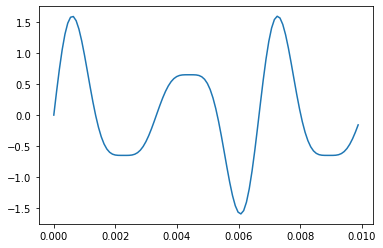

In [ ]:
from thinkdsp import SinSignal
from thinkdsp import CosSignal

signal = (SinSignal(freq = 300, amp = 1.0) + SinSignal(freq = 450, amp = 0.5) + SinSignal(freq = 600, amp = 0.25))
signal.plot()

用這些信號來生成波:

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

聽起來像這樣:

In [ ]:
wave2.make_audio()

因為都是150倍數的關係，聽起來很連貫。

以下是這個波的頻譜:

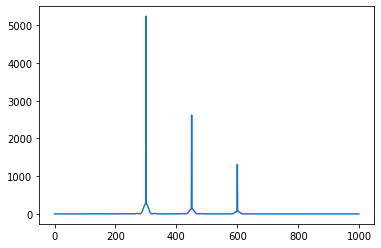

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=1000)

In [ ]:
signal += CosSignal(freq=400)
signal.make_wave().make_audio()

可以很明顯地感覺到有兩種聲音。

### Exercise 1.4

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

使用同一份音檔

In [ ]:
wave3 = read_wave('573602__acollier123__vibrato-piano-c.wav')
wave3.normalize()
wave3.make_audio()

定義stretch:

In [ ]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

以下是經過2倍速處理後的音訊:

In [ ]:
stretch(wave3, 0.5)
wave3.make_audio()

以下是與原音的比較:

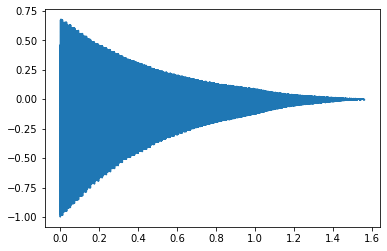

In [ ]:
wave.plot()

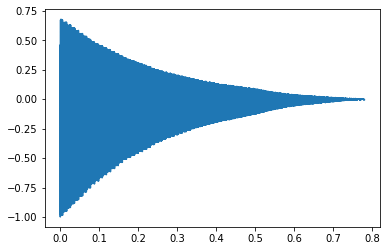

In [ ]:
wave3.plot()